In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os

In [116]:
filename1 = r"data/input/Kaggle/graduate-admissions/Admission_Predict.csv"
filename2 = r"data/input/Kaggle/graduate-admissions/Admission_Predict_Ver1.1.csv"

df1 = pd.read_csv(filename1, sep='\s*,\s*', header=0, encoding='ascii', engine='python')
df2 = pd.read_csv(filename2, sep='\s*,\s*', header=0, encoding='ascii', engine='python')

In [117]:
df1.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [118]:
df2.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


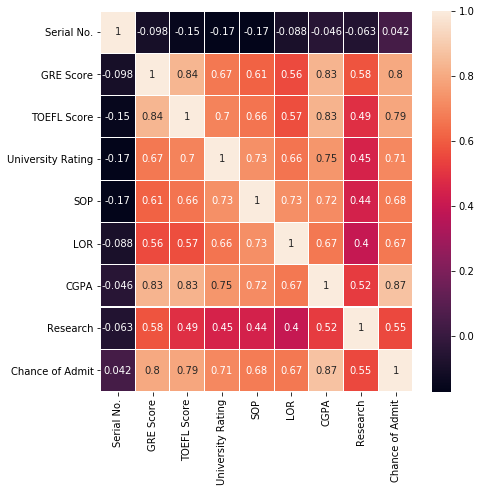

In [119]:
fig,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(df1.corr(), ax=ax, annot=True, linewidths=0.05)
plt.show()

In [120]:
print(len(df1), len(df2))
# x_cols = ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR", "CGPA", "Research"]
x_cols = ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR", "CGPA", "Research"]
y_col = "Chance of Admit"


for col in x_cols:
    df1[col] = (df1[col]-min(df1[col]))/(max(df1[col] - min(df1[col])))
    df2[col] = (df2[col]-min(df2[col]))/(max(df2[col]) - min(df1[col]))

400 500


In [178]:
X = df2[x_cols].values
y = df2["Chance of Admit"].values

In [179]:
def print_performance(model, X_test, y_test):
    preds = model.predict(X_test)

    explained_variance_score = metrics.explained_variance_score(y_test, preds)
    mean_absolute_error = metrics.mean_absolute_error(y_test, preds)
    mean_squared_log_error = metrics.mean_squared_log_error(y_test, preds)
    median_absolute_error = metrics.median_absolute_error(y_test, preds)
    r2_score = metrics.r2_score(y_test, preds)

    print("-"*55)
    print("Performance")
    print("-"*55)
    print("{} : {:.4f}".format("Explained Variance Score ", explained_variance_score))
    print("{} : {:.4f} ".format("Mean Absolute Error      ", mean_absolute_error))
    print("{} : {:.4f} ".format("Mean Squared Error       ", mean_squared_log_error))
    print("{} : {:.4f} ".format("Median Squared Error     ", median_absolute_error))
    print("{} : {:.4f} ".format("R2 Score                 ", r2_score))
    print("-"*55)
    print("\n\n")

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics 




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("Linear Regression")
model = LinearRegression()
model.fit(X_train, y_train)
print_performance(model, X_test, y_test)

Linear Regression
-------------------------------------------------------
Performance
-------------------------------------------------------
Explained Variance Score  : 0.8122
Mean Absolute Error       : 0.0454 
Mean Squared Error        : 0.0018 
Median Squared Error      : 0.0299 
R2 Score                  : 0.8045 
-------------------------------------------------------



